# Import Labraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load Dataset

In [50]:
df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")
print(df.head())

                            Customer_ID        Customer_Name  Gender  Age  \
0  d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e           Osha Tella    Male   60   
1  7c14ad51-781a-4db9-b7bd-67439c175262      Hredhaan Khosla  Female   51   
2  3a73a0e5-d4da-45aa-85f3-528413900a35       Ekani Nazareth    Male   20   
3  7902f4ef-9050-4a79-857d-9c2ea3181940  Yamini Ramachandran  Female   57   
4  3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9         Kritika Rege  Female   43   

         State                City                Bank_Branch Account_Type  \
0       Kerala  Thiruvananthapuram  Thiruvananthapuram Branch      Savings   
1  Maharashtra              Nashik              Nashik Branch     Business   
2        Bihar           Bhagalpur           Bhagalpur Branch      Savings   
3   Tamil Nadu             Chennai             Chennai Branch     Business   
4       Punjab            Amritsar            Amritsar Branch      Savings   

                         Transaction_ID Transaction_Date  ...  \
0  

# Data Insection


In [51]:
print(df.size)
print(df.shape)
print(df.isna().sum())

4800000
(200000, 24)
Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64


In [52]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  str    
 1   Customer_Name            200000 non-null  str    
 2   Gender                   200000 non-null  str    
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  str    
 5   City                     200000 non-null  str    
 6   Bank_Branch              200000 non-null  str    
 7   Account_Type             200000 non-null  str    
 8   Transaction_ID           200000 non-null  str    
 9   Transaction_Date         200000 non-null  str    
 10  Transaction_Time         200000 non-null  str    
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  str    
 13  Transaction_Type         200000 non-null  str    
 14  Merchant_Catego

In [53]:
print(df.describe())

                 Age  Transaction_Amount  Account_Balance       Is_Fraud
count  200000.000000       200000.000000    200000.000000  200000.000000
mean       44.015110        49538.015554     52437.988784       0.050440
std        15.288774        28551.874004     27399.507128       0.218852
min        18.000000           10.290000      5000.820000       0.000000
25%        31.000000        24851.345000     28742.395000       0.000000
50%        44.000000        49502.440000     52372.555000       0.000000
75%        57.000000        74314.625000     76147.670000       0.000000
max        70.000000        98999.980000     99999.950000       1.000000


In [54]:
print(df.duplicated().sum())



0


# Columns

In [55]:
print(df.columns)


Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='str')


# Fraud analysis

In [56]:
total_transactions =len(df)
print( "total_transactions:", total_transactions)
#fraud cases
fraud_cases = df["Is_Fraud"].sum()
print("Fraud cases:", fraud_cases)
fraud_percentage = (fraud_cases/total_transactions) * 100
print("fraud percentage:", fraud_percentage.round(2),"%")

total_transactions: 200000
Fraud cases: 10088
fraud percentage: 5.04 %


In [57]:
#Fraud vs Nonfraud Amount Analysis
fraud_analysis=df[df["Is_Fraud"]==1]["Transaction_Amount"].sum()
print("Total Fraud Amount:",fraud_analysis)
non_fraud_analysis=df[df["Is_Fraud"]==0]["Transaction_Amount"].sum()
print("Total Non-Fraud Amount:",non_fraud_analysis)


Total Fraud Amount: 497115709.84
Total Non-Fraud Amount: 9410487401.0


# Featurre Engineering

In [58]:
# Exract Time Feature
df["Transaction_Date"]=pd.to_datetime(df["Transaction_Date"])
df["Transaction_Hour"]=df["Transaction_Date"].dt.hour
df["Transaction_Month"]=df["Transaction_Date"].dt.month
df["Day_of_week"]=df["Transaction_Date"].dt.dayofweek


C:\Users\pratikshabagwale\AppData\Local\Temp\ipykernel_12824\3305448216.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Transaction_Date"]=pd.to_datetime(df["Transaction_Date"])


In [59]:
#High Amount Flag
df["High_Amount"]=np.where(df["Transaction_Amount"]>df["Transaction_Amount"].mean(),1,0)
print(df["High_Amount"])

0         0
1         0
2         1
3         0
4         0
         ..
199995    1
199996    0
199997    1
199998    0
199999    1
Name: High_Amount, Length: 200000, dtype: int64


# Exploratory Data Analysis (EDA)

Is_Fraud
0    189912
1     10088
Name: count, dtype: int64


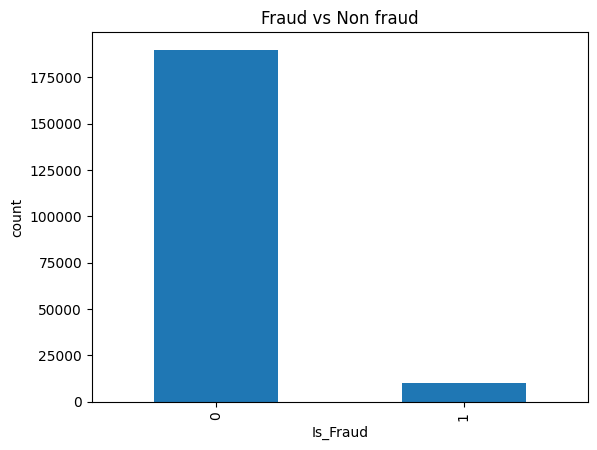

In [60]:
#Fraud Distrubution
from matplotlib.pyplot import plot

fraud_count=df["Is_Fraud"].value_counts()
print(fraud_count)
fraud_count.plot(kind="bar")
plt.title("Fraud vs Non fraud")
plt.xlabel("Is_Fraud")
plt.ylabel("count")
plt.show()

Transaction_Type
Bill Payment    1973
Credit          2048
Debit           2033
Transfer        2073
Withdrawal      1961
Name: Is_Fraud, dtype: int64


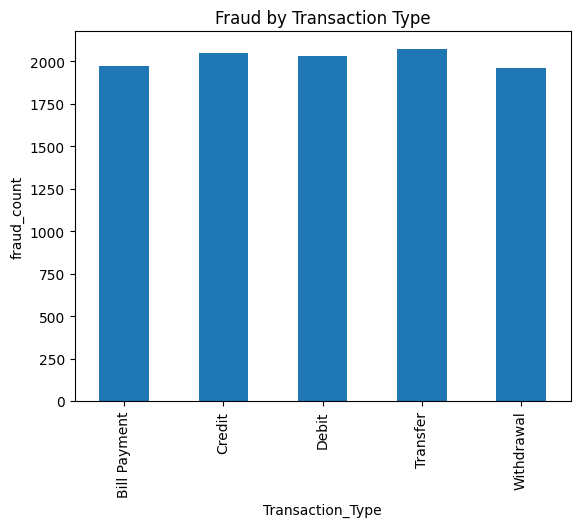

In [61]:
#Fraud by Transaction Type
fraud_type=df.groupby("Transaction_Type")["Is_Fraud"].sum()
print(fraud_type)
from matplotlib.pyplot import plot
fraud_type.plot(kind="bar")
plt.title("Fraud by Transaction Type")
plt.xlabel("Transaction_Type")
plt.ylabel("fraud_count")
plt.show()

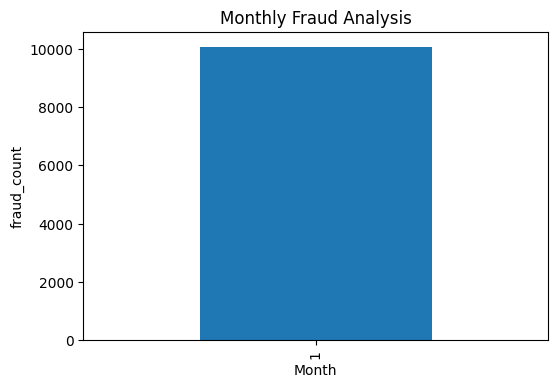

In [62]:
#Fraud analysis by month
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
fraud_count=df["Is_Fraud"].value_counts()
plt.figure(figsize=(6,4))
monthly_fraud.plot(kind="bar")
plt.title("Monthly Fraud Analysis")
plt.xlabel("Month")
plt.ylabel("fraud_count")
plt.show()

# Grouping of Transaction Amount

In [71]:
#transactions amount by transaction time 
Transaction_by_time=df.groupby("Transaction_Time")["Is_Fraud"].sum()
print(Transaction_by_time)



Transaction_Time
00:00:00    0
00:00:01    1
00:00:02    0
00:00:03    0
00:00:04    0
           ..
23:59:55    0
23:59:56    0
23:59:57    0
23:59:58    0
23:59:59    0
Name: Is_Fraud, Length: 77856, dtype: int64


In [72]:
#Fraud analysis according to month
df["Transaction_Date"]=pd.to_datetime(df["Transaction_Date"])
df["Month"]=df["Transaction_Date"].dt.month
monthly_fraud=df.groupby("Month")["Is_Fraud"].sum()
print(monthly_fraud)

Month
1    10088
Name: Is_Fraud, dtype: int64


In [73]:
# fraud analysis by customer name
customer_fraud=df.groupby("Customer_Name")["Is_Fraud"].sum()
customer_fraud=customer_fraud[customer_fraud>0]
customer_fraud=customer_fraud.sort_values(ascending=False).head(10)
print(customer_fraud)


Customer_Name
Dhruv Sagar              3
Michael Nayak            3
Anamika Deol             2
Deepa Purohit            2
Garima Bobal             2
Jagdish Radhakrishnan    2
Gaurang Raghavan         2
Akshay Chaudhry          2
Chasmum Sarna            2
Jack Manne               2
Name: Is_Fraud, dtype: int64


In [74]:
customer_analysis = df.groupby("Customer_Name").agg(
Total_Transactions=("Is_Fraud", "count"),
Fraud_Count=("Is_Fraud", "sum"))


customer_analysis["Fraud_Rate_%"] = (
    customer_analysis["Fraud_Count"] / customer_analysis["Total_Transactions"] * 100
)

# Filter suspicious customers
suspicious_customers = customer_analysis[
    customer_analysis["Fraud_Count"] > 0
].sort_values("Fraud_Count", ascending=False)

print(suspicious_customers.head(10))

                       Total_Transactions  Fraud_Count  Fraud_Rate_%
Customer_Name                                                       
Dhruv Sagar                             4            3     75.000000
Michael Nayak                           3            3    100.000000
Anamika Deol                            3            2     66.666667
Deepa Purohit                           3            2     66.666667
Garima Bobal                            3            2     66.666667
Jagdish Radhakrishnan                   3            2     66.666667
Gaurang Raghavan                        3            2     66.666667
Akshay Chaudhry                         4            2     50.000000
Chasmum Sarna                           3            2     66.666667
Jack Manne                              3            2     66.666667


In [75]:
#High Risk Customer
high_risk = customer_analysis[
    customer_analysis["Fraud_Rate_%"] > 50
].sort_values("Fraud_Rate_%",ascending=False).head(10)

print(high_risk)

                  Total_Transactions  Fraud_Count  Fraud_Rate_%
Customer_Name                                                  
Zinal Tailor                       1            1         100.0
Aachal Bandi                       1            1         100.0
Aachal Baral                       1            1         100.0
Aachal Chaudry                     1            1         100.0
Aachal Dasgupta                    1            1         100.0
Aachal Dewan                       1            1         100.0
Aachal D’Alia                      1            1         100.0
Aachal Jayaraman                   1            1         100.0
Aachal Nagi                        1            1         100.0
Aachal Som                         1            1         100.0


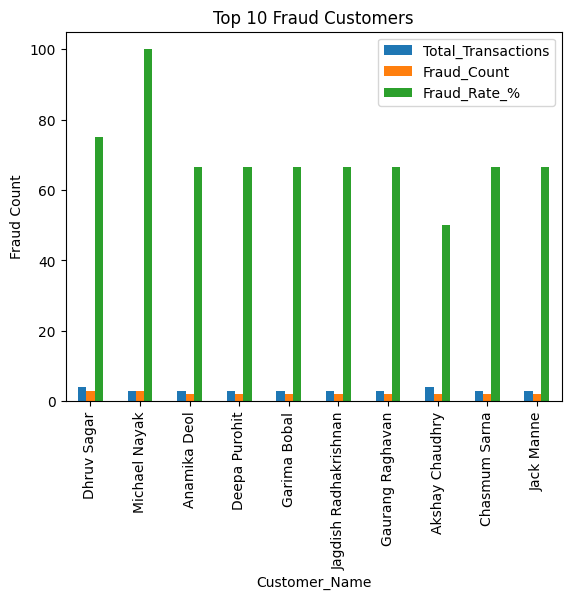

In [76]:
#Visualizations
import matplotlib.pyplot as plt

top_customers = suspicious_customers.head(10)

top_customers.plot(kind="bar")
plt.title("Top 10 Fraud Customers")
plt.ylabel("Fraud Count")
plt.show()

In [77]:
#Risk Score analysis

df["Risk_Score"] = (
    (df["Transaction_Amount"] / df["Transaction_Amount"].max()) * 0.5 +
    (df["Is_Fraud"] * 0.5)
)

print(df[["Transaction_Amount", "Risk_Score"]].head())

   Transaction_Amount  Risk_Score
0            32415.45    0.163714
1            43622.60    0.220316
2            63062.56    0.318498
3            14000.72    0.070711
4            18335.16    0.092602


# Business Insights & Reccomendation

1. High transaction amounts show higher fraud probability.
2. Certain hours show more fraud activity.
3. Model can detect fraud with X% accuracy.
4. Bank should implement real-time fraud alerts.
5. High-risk transactions should require OTP verification.

# Conclusion

Random Forest performed better than Logistic Regression.
Fraud detection model can significantly reduce financial losses.\n
Further improvement can be done using XGBoost and SMOTE.